In [7]:
# instructions
# keep only one .data file


import glob
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
from config import *

# process .data file
data = [(a.split('=')[0].strip(), a.split('=')[1].strip()) for a in open(glob.glob('*.data')[0], 'r').readlines()]
print(data)

# no. of clusters by default == no. of classes

n_classes = int(data[0][1]) if data[0][0] == 'classes' else print('Invalid .data format [no classes]')
train_path = data[1][1] if data[1][0] == 'train' else print('Invalid .data format [no train]')

# update

print(n_classes)





H = []
W = []

train_files = [a.strip() for a in open(train_path, 'r').readlines()]

# reading .txt files

for txt in train_files:
    txt = txt.split('.')[0] + '.txt'
    try:
        objs = [a.strip().split(' ')[-2:] for a in open(txt, 'r').readlines()]
        for obj in objs:
            W.append(int(float(obj[0])*yolo_height))
            H.append(int(float(obj[1])*yolo_width))
    except Exception as e:
        print(e)
        pass
    
H = np.array(H)
W = np.array(W)

x=[W,H]
x=np.asarray(x)
#print(x.shape)
x=x.transpose()
#print(x.shape)

kmeans3 = KMeans(n_clusters=n_clusters)
kmeans3.fit(x)
y_kmeans3 = kmeans3.predict(x)

yolo_anchor_average=[]
for ind in range (n_clusters):
    yolo_anchor_average.append(np.mean(x[y_kmeans3==ind],axis=0))

yolo_anchor_average=np.array(yolo_anchor_average, dtype=np.int)

print(f'anchors are : {yolo_anchor_average}')

plt.scatter(x[:, 0], x[:, 1], c=y_kmeans3, s=2, cmap='viridis')
plt.scatter(yolo_anchor_average[:, 0], yolo_anchor_average[:, 1], c='black', s=30);
plt.xlabel('width')
plt.ylabel('height')
plt.savefig('cluster.png', dpi = 300)

[('classes', '60'), ('train', 'test_lp.txt'), ('valid', 'test_lp.txt'), ('names', 'lp.names'), ('backup', 'backup_lp/')]
60


(2, 10887)
(10887, 2)


In [25]:
yolo_anchor_average

array([[14, 34],
       [81, 36],
       [14, 39],
       [12, 26]])

anchors are : [[14 34]
 [81 36]
 [14 39]
 [12 26]]


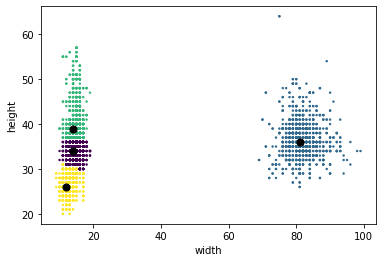